## Objective 

This project aims to analyze Walmart's historical weekly sales data to uncover trends and patterns. By examining factors such as holidays, temperature, fuel prices, CPI, and unemployment rates, we seek to understand their impact on sales performance. 

### Data Loading 

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('walmart_sales _data.csv')

In [4]:
data 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


STARTING 10 ROWS

In [5]:
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


END 10 ROWS

In [6]:
data.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


TOTAL ROWS AND COLUMNS

In [7]:
data.shape

(6435, 8)

In [8]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  6435
Number of columns:  8


### Basic Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [11]:
data.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


### Checking Null Values 

In [12]:
data.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [13]:
data.isnull(). sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [14]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

## Statistical Analysis

In [15]:
# Calculate mean, median, and mode for 'Weekly_Sales'
mean_sales = data['Weekly_Sales'].mean()
median_sales = data['Weekly_Sales'].median()
mode_sales = data['Weekly_Sales'].mode()

print("Basic Statistical Analysis for Weekly Sales:")
print("Mean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)


Basic Statistical Analysis for Weekly Sales:
Mean: 1046964.8775617715
Median: 960746.04
Mode: 0        209986.25
1        213538.32
2        215359.21
3        219804.85
4        220060.35
           ...    
6430    3595903.20
6431    3676388.98
6432    3749057.69
6433    3766687.43
6434    3818686.45
Name: Weekly_Sales, Length: 6435, dtype: float64


In [16]:
from scipy.stats import ttest_ind

# Calculate descriptive statistics for 'Weekly_Sales'
weekly_sales_stats = data['Weekly_Sales'].describe()
print("Descriptive Statistics for Weekly Sales:")
print(weekly_sales_stats)
print("\n")

# Perform hypothesis testing for average weekly sales between holiday and non-holiday weeks
holiday_sales = data[data['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = data[data['Holiday_Flag'] == 0]['Weekly_Sales']

t_statistic, p_value = ttest_ind(holiday_sales, non_holiday_sales)

print("Hypothesis Testing Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("\n")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average weekly sales between holiday and non-holiday weeks.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average weekly sales between holiday and non-holiday weeks.")


Descriptive Statistics for Weekly Sales:
count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64


Hypothesis Testing Results:
T-statistic: 2.9608919093259036
P-value: 0.003078699263818616


Reject the null hypothesis: There is a significant difference in average weekly sales between holiday and non-holiday weeks.


## EDA 

In [17]:
data.dtypes  #data types

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [18]:
data[['Store']] = data[['Store']].astype(str)  #converting store to string

In [19]:
# converting date column to date,month,year
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')  

#converting date,month and year to string
data['date'] = data['Date'].dt.date.astype(str)
data['Year'] = data['Date'].dt.year.astype(str)   
data['Month'] = data['Date'].dt.month.astype(str)

In [20]:
data 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,date,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010-02-05,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010-02-12,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010-03-05,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012-09-28,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012-10-05,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012-10-12,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012-10-19,2012,10


DATA TYPES AFTER CONVERTING THERE TYPES: 

In [21]:
data.dtypes

Store                   object
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
date                    object
Year                    object
Month                   object
dtype: object

In [22]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'date', 'Year', 'Month'],
      dtype='object')

In [23]:
data['Store'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'],
      dtype=object)

In [24]:
data["Holiday_Flag"].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

### Visualization 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

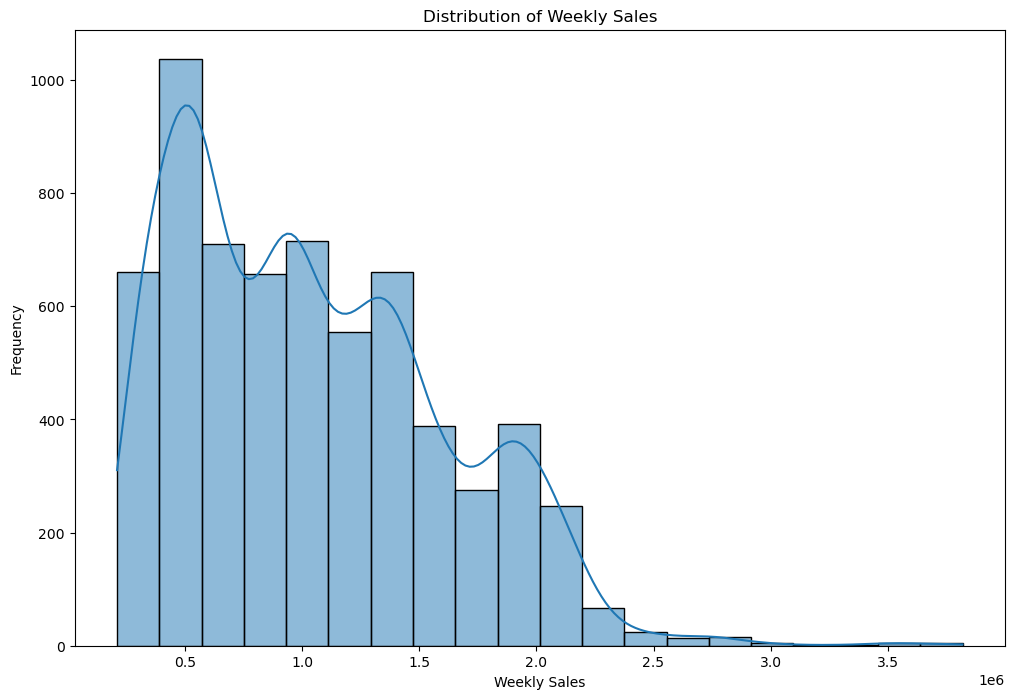

In [26]:
# Visualize distributions of numerical variables
plt.figure(figsize=(12, 8))
sns.histplot(data['Weekly_Sales'], bins=20, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

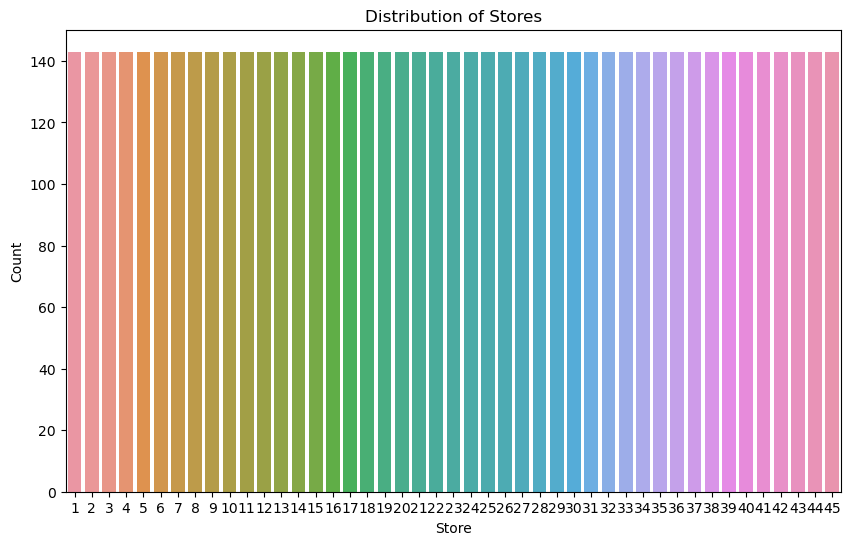

In [27]:
# Visualize distributions of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Store', data=data)
plt.title('Distribution of Stores')
plt.xlabel('Store')
plt.ylabel('Count')
plt.show() 

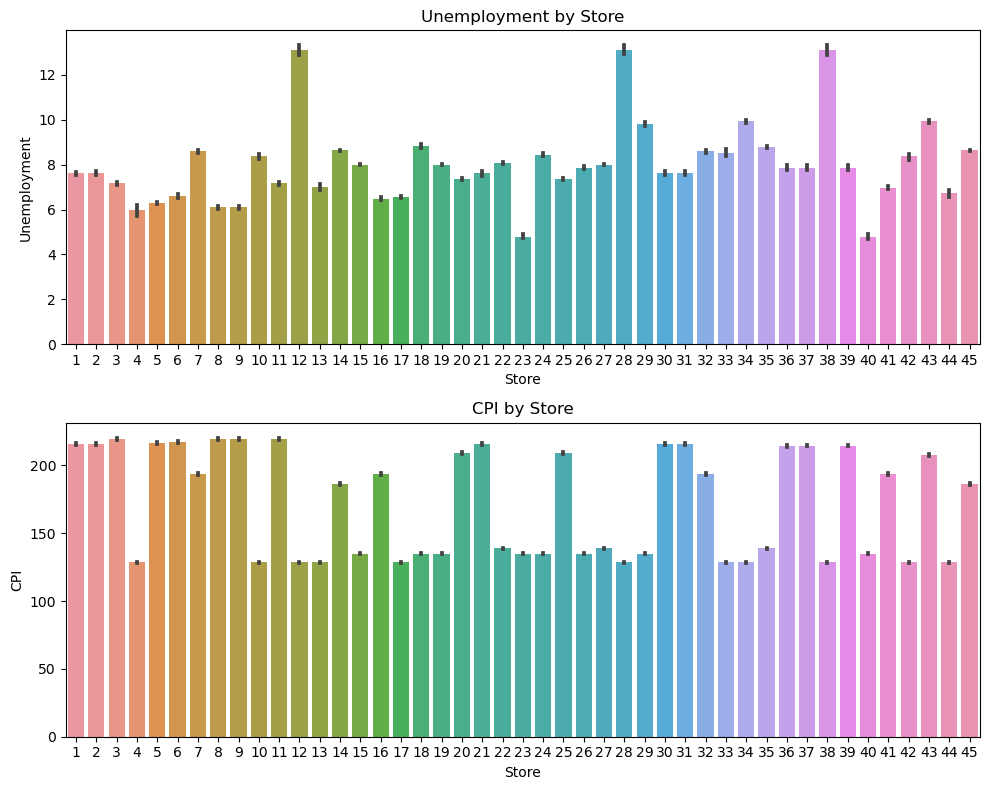

In [28]:
# Create a figure with two subplots
plt.figure(figsize=(10, 8))

# Plot Unemployment by Store
plt.subplot(2, 1, 1)
sns.barplot(x='Store', y='Unemployment', data=data)
plt.title('Unemployment by Store')

# Plot CPI by Store
plt.subplot(2, 1, 2)
sns.barplot(x='Store', y='CPI', data=data)
plt.title('CPI by Store')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


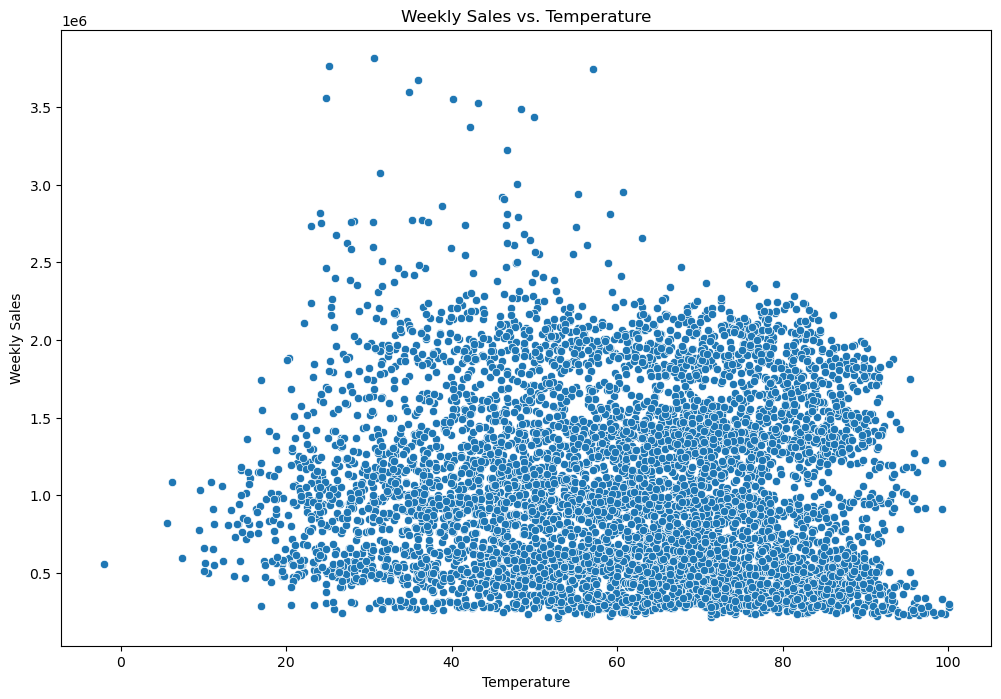

In [29]:
# Explore relationships between variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

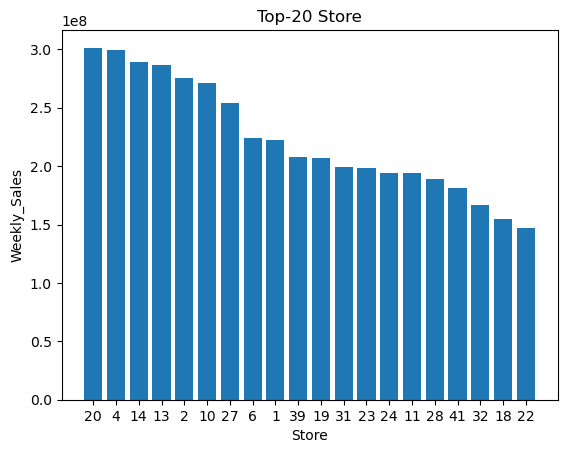

In [30]:
top_n = 20
x_col = 'Store'
y_col = 'Weekly_Sales'

# Create a frequency table for the "Product" column
table = data.groupby(x_col)[y_col].sum().sort_values(ascending=False)

# Create a bar chart
plt.bar(table.index[:top_n], table.values[:top_n])

# Set the chart title and axes labels
plt.title(f'Top-{min(top_n, len(table.index))} {x_col}')
plt.xlabel(x_col)
plt.ylabel(y_col)

plt.show

Bar plot showing total weekly sales by holiday flag

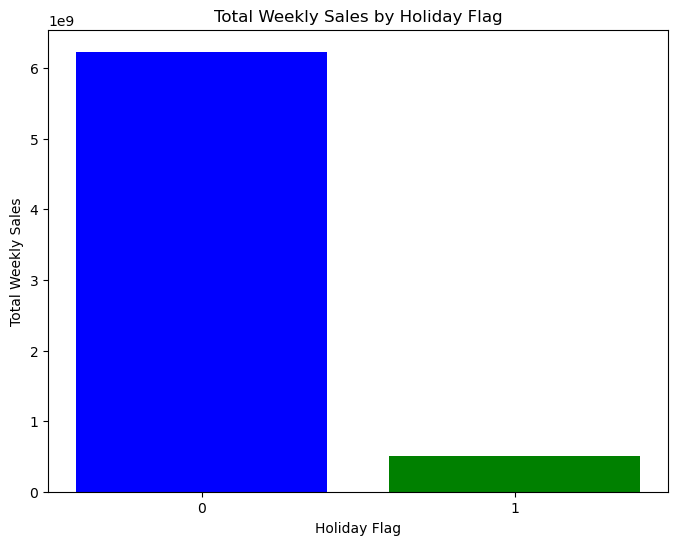

In [31]:
# Calculate total weekly sales for each holiday flag
total_sales_by_holiday = data.groupby('Holiday_Flag')['Weekly_Sales'].sum()

# Create a bar plot with different colors for each bar
plt.figure(figsize=(8, 6))
plt.bar(total_sales_by_holiday.index.astype(str), total_sales_by_holiday.values, color=['blue', 'green'])

# Set the chart title and axes labels
plt.title('Total Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Total Weekly Sales')

# Remove grid lines
plt.grid(False)

plt.show()


### Line Chart 

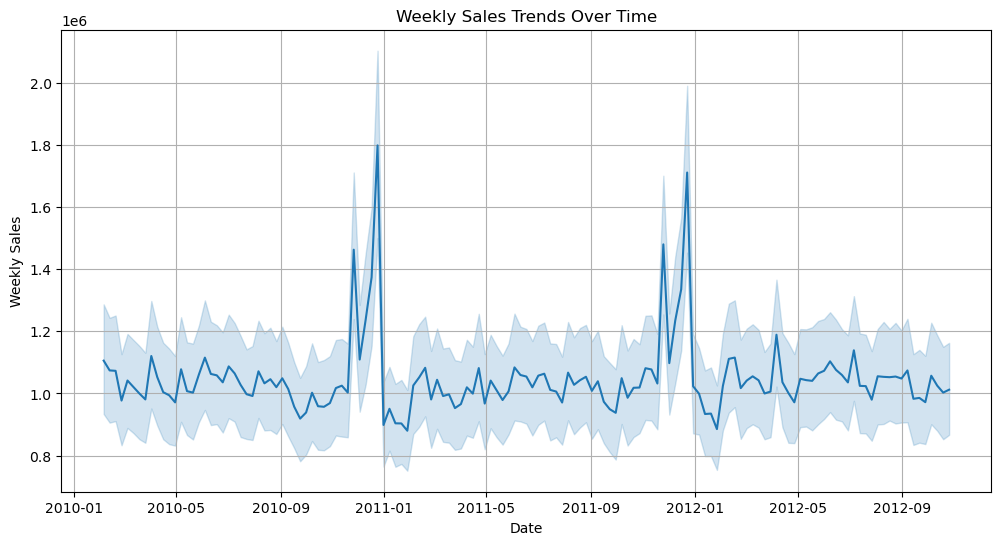

In [32]:
# Create a line chart of weekly sales trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

### Scatter plot 

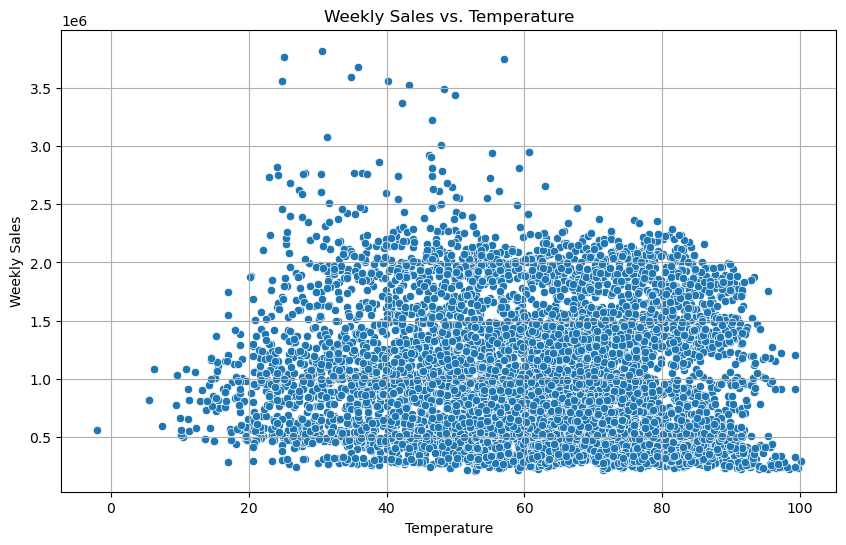

In [33]:
# Create a scatter plot of weekly sales vs. temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

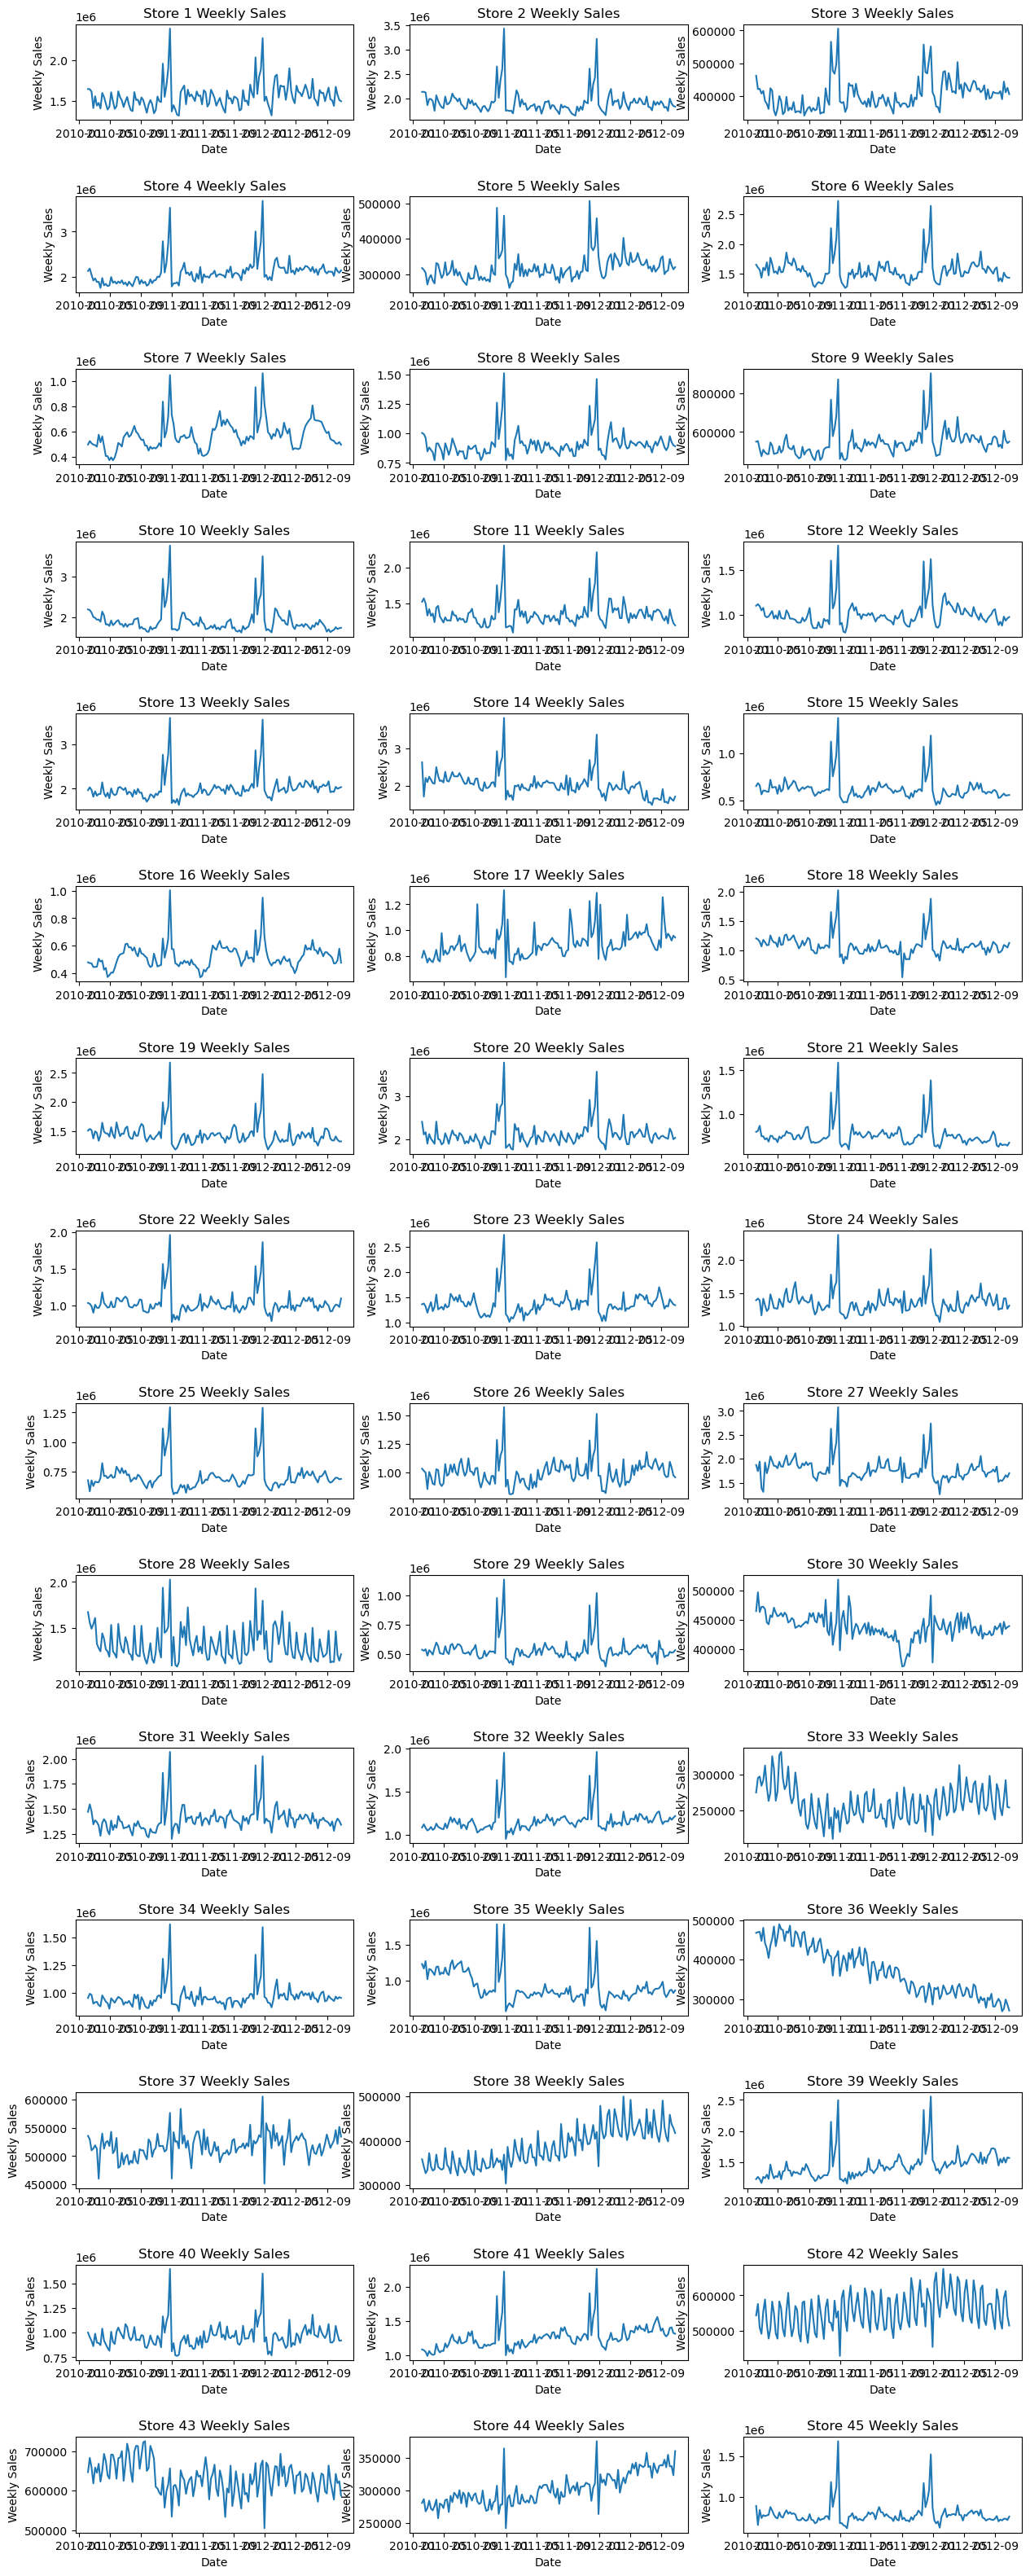

In [34]:
# Create a figure and adjust layout
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)

# Group the data by store
for store, data_store in data.groupby('Store'):
    # Aggregate weekly sales for each date
    sales_by_date = data_store.groupby('Date')['Weekly_Sales'].sum()
    
    # Create a subplot for each store
    plt.subplot(15, 3, int(store))
    
    # Plot weekly sales for the store
    plt.plot(sales_by_date.index, sales_by_date.values)
    
    # Set title and axis labels for each subplot
    plt.title(f'Store {store} Weekly Sales')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')

# Show the plot
plt.show()


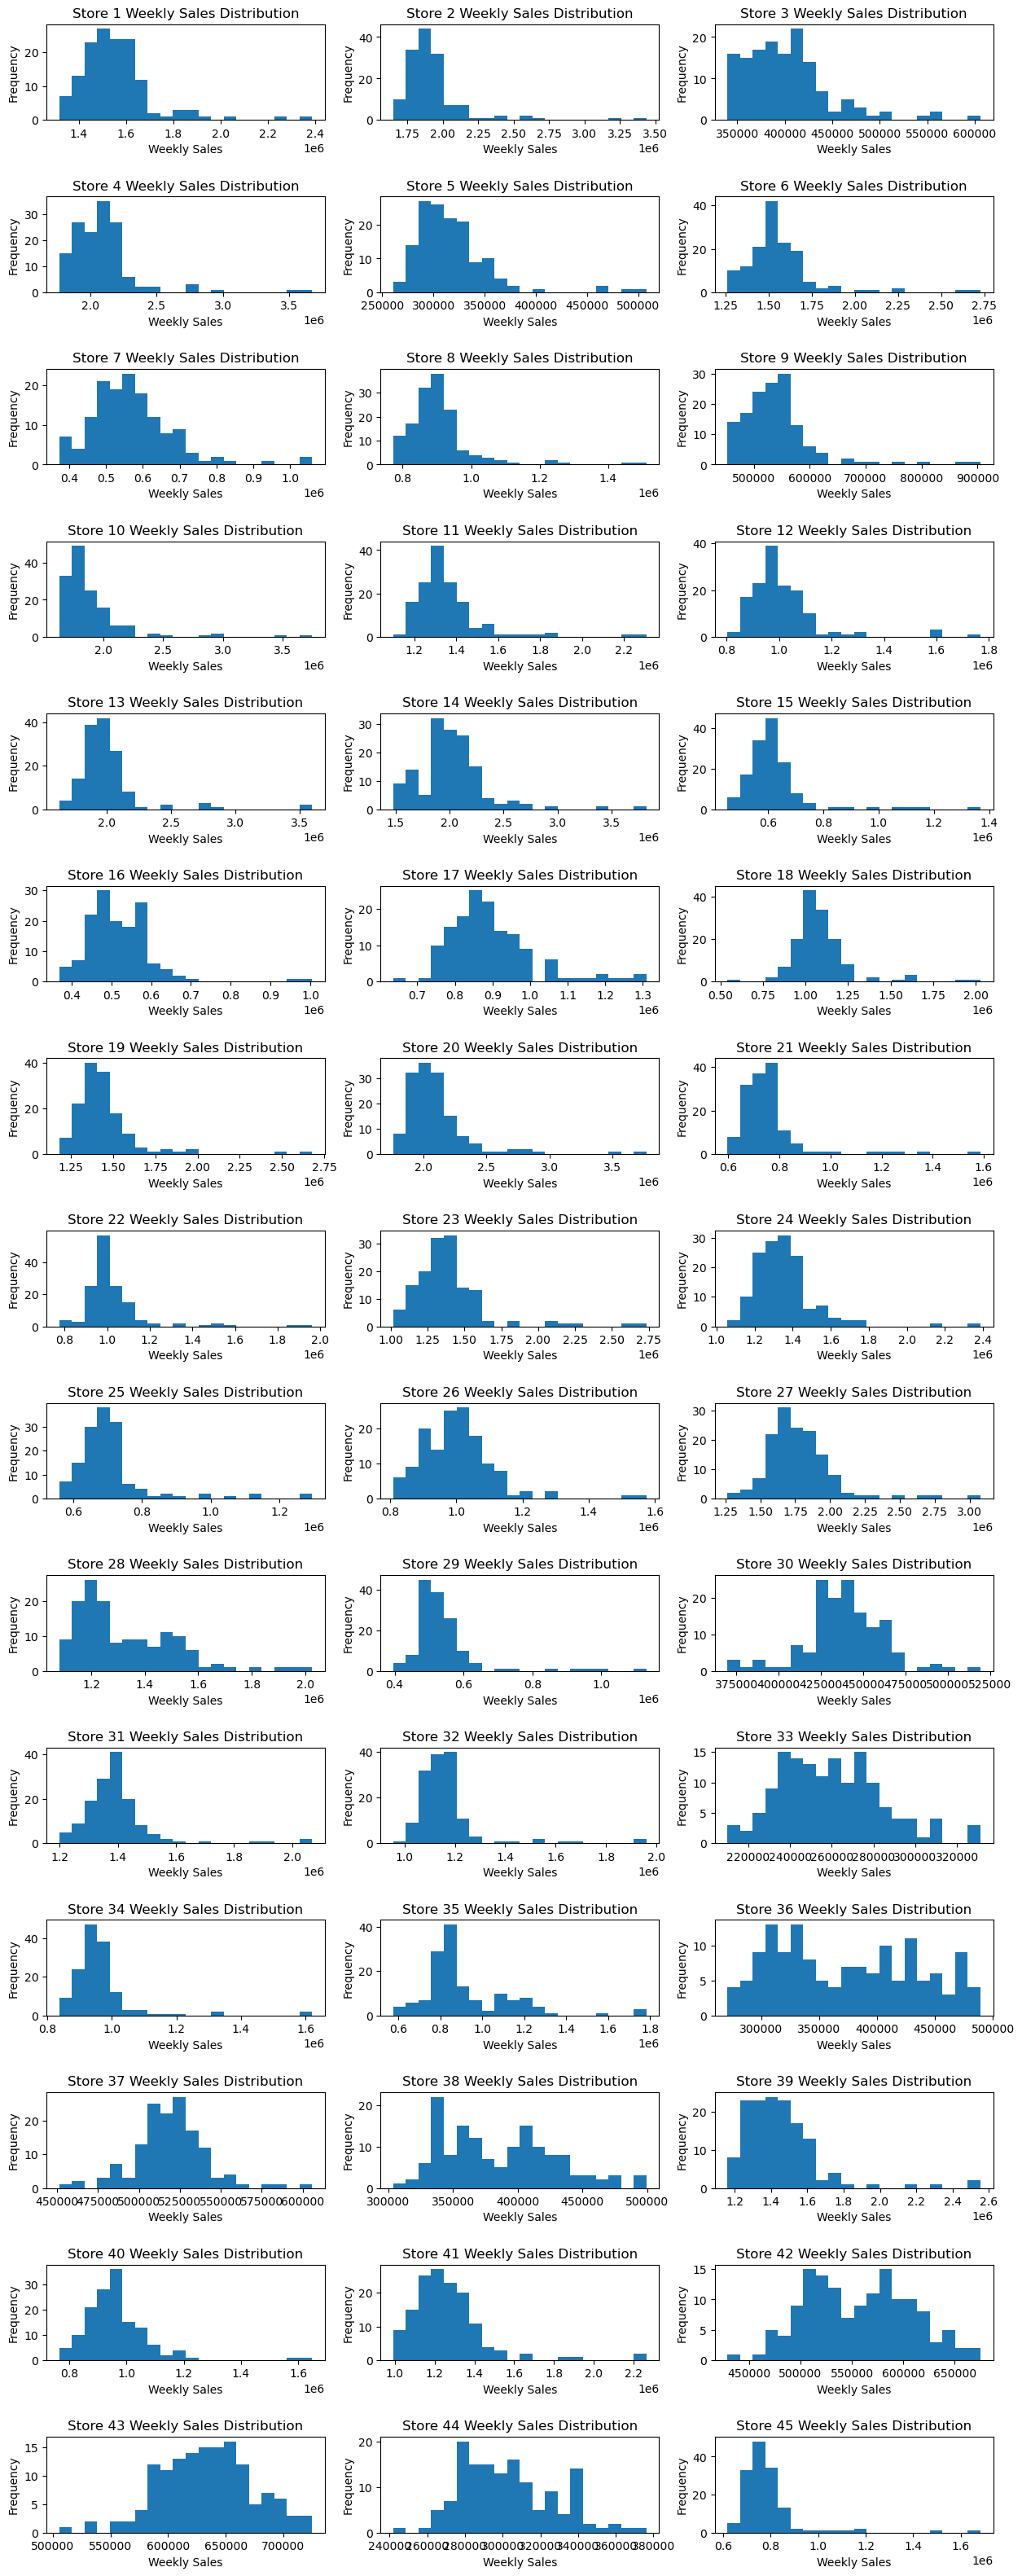

In [35]:
# Create a figure and adjust layout
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)

# Group the data by store
for store, data_store in data.groupby('Store'):
    # Aggregate weekly sales for each date
    sales_by_date = data_store.groupby('Date')['Weekly_Sales'].sum()
    
    # Create a subplot for each store
    plt.subplot(15, 3, int(store))
    
    # Plot histogram of weekly sales for the store
    plt.hist(sales_by_date, bins=20)  # You can adjust the number of bins as needed
    
    # Set title and axis labels for each subplot
    plt.title(f'Store {store} Weekly Sales Distribution')
    plt.xlabel('Weekly Sales')
    plt.ylabel('Frequency')

# Show the plot
plt.show()


### BoxPlot 

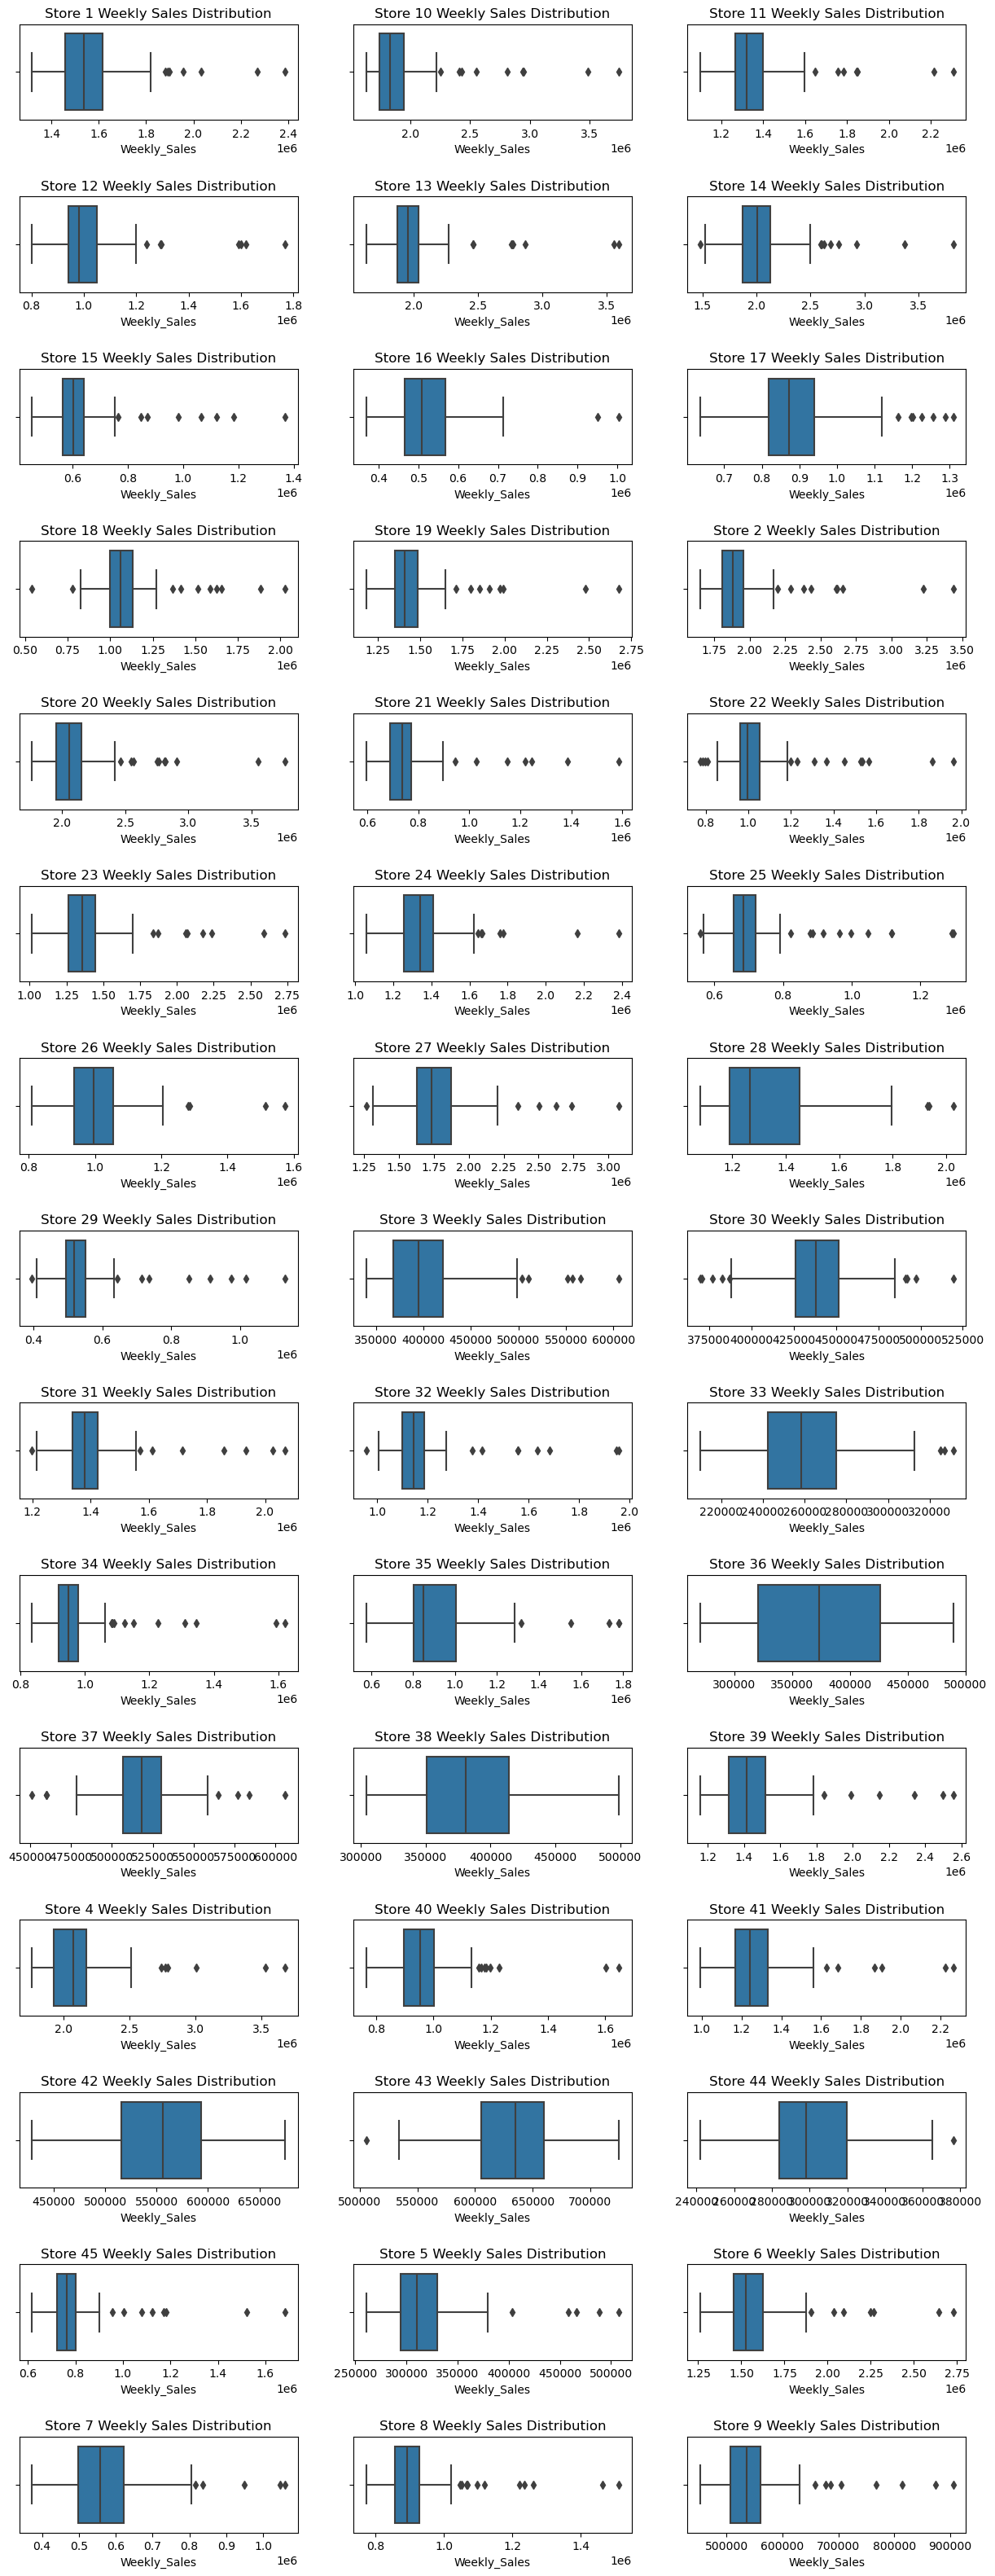

In [36]:
# Create a figure and adjust layout
plt.figure(figsize=(15, 40))
plt.tight_layout()
plt.subplots_adjust(hspace=0.8)

# Group the data by store
for i, (store, data_store) in enumerate(data.groupby('Store'), start=1):
    # Create a subplot for each store
    plt.subplot(15, 3, i)
    
    # Plot box plot of weekly sales for the store
    sns.boxplot(x='Weekly_Sales', data=data_store, ax=plt.gca())
    
    # Set title and axis labels for each subplot
    plt.title(f'Store {store} Weekly Sales Distribution')

# Show the plot
plt.show()


### Correlation Matrix 

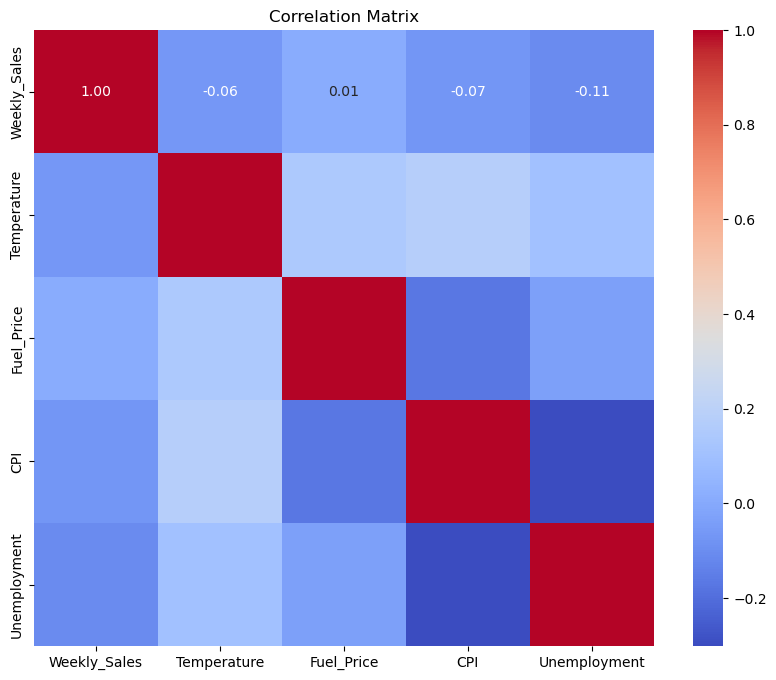

In [37]:
# Select numerical features for correlation analysis
numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Compute the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


CONCLUSION:
This is proper Sales Analysis on Walmart which is perform on weekly basis. This project consist of proper Statistical Analysis, EDA()